In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-civfi6ph because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# 데이터는 공통으로 사용하니 먼저 사용하는 데이터 정제부터 하고
# 각각 구현하는게 좋을 듯 싶어요!

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")

training_data = df[['Temp', 'Ozone']]

# 1. 결측치 처리
training_data = training_data.dropna(how='any')

# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

print(outlier)

# 이상치를 제거한 결과를 얻어야 해요!
# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_dat = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]
display(training_data)

# 3. 정규화 진행(Normalization)
#    모든 feature에 대해 scale을 0과 1로 변경!
#    이렇게 해야 해요!
#    먼저 Temp에 대해 최대값, 최소값을 찾아요!
print(np.max(training_data['Temp'].values))
print(np.min(training_data['Temp'].values))
#    프로그램적으로 이 작업을 하려면 코드작업을 해야해서 좀 그래요!
#    sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

scaled_x.fit(training_data['Temp'].values.reshape(-1, 1))
scaled_t.fit(training_data['Ozone'].values.reshape(-1, 1))

# Training Data Set 준비
x_data = scaled_x.transform(training_data['Temp'].values.reshape(-1, 1))
t_data = scaled_t.transform(training_data['Ozone'].values.reshape(-1, 1))

print(x_data)
print(t_data)

29     115.0
61     135.0
85     108.0
98     122.0
100    110.0
116    168.0
120    118.0
Name: Ozone, dtype: float64


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


97
57
[[0.25 ]
 [0.375]
 [0.425]
 [0.125]
 [0.225]
 [0.2  ]
 [0.05 ]
 [0.1  ]
 [0.425]
 [0.3  ]
 [0.225]
 [0.275]
 [0.025]
 [0.175]
 [0.225]
 [0.   ]
 [0.275]
 [0.125]
 [0.05 ]
 [0.4  ]
 [0.1  ]
 [0.1  ]
 [0.25 ]
 [0.6  ]
 [0.55 ]
 [0.475]
 [0.625]
 [0.825]
 [0.75 ]
 [0.625]
 [0.5  ]
 [0.375]
 [0.2  ]
 [0.4  ]
 [0.475]
 [0.675]
 [0.7  ]
 [0.6  ]
 [0.65 ]
 [0.65 ]
 [0.775]
 [0.875]
 [0.875]
 [0.8  ]
 [0.4  ]
 [0.6  ]
 [0.575]
 [0.6  ]
 [0.625]
 [0.675]
 [0.75 ]
 [0.7  ]
 [0.425]
 [0.725]
 [0.7  ]
 [0.625]
 [0.725]
 [0.775]
 [0.725]
 [0.65 ]
 [0.6  ]
 [0.6  ]
 [0.6  ]
 [0.625]
 [0.725]
 [0.7  ]
 [0.75 ]
 [0.8  ]
 [0.825]
 [0.825]
 [0.725]
 [0.625]
 [0.575]
 [0.5  ]
 [0.55 ]
 [0.475]
 [0.525]
 [0.525]
 [0.5  ]
 [0.375]
 [0.55 ]
 [0.6  ]
 [0.725]
 [1.   ]
 [0.925]
 [0.975]
 [0.925]
 [0.85 ]
 [0.875]
 [0.9  ]
 [0.9  ]
 [0.75 ]
 [0.675]
 [0.575]
 [0.525]
 [0.45 ]
 [0.4  ]
 [0.6  ]
 [0.475]
 [0.5  ]
 [0.35 ]
 [0.35 ]
 [0.525]
 [0.25 ]
 [0.475]
 [0.275]
 [0.625]
 [0.175]
 [0.35 ]
 [0.6  ]
 [0.

In [3]:
# Python 직접구현

## 수치미분 코드
def numerical_derivative(f, x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데... y = Wx + b
W = np.random.rand(1, 1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data - y), 2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

# 학습종료 후 예측
# 온도가 62도일때 Ozone량은 얼마?
# 지금 만들어진 모델은 온도값이 0~1, 오존값도 0~1사이의 값
# 당연히 내가 알고싶은 데이터도 scaling해서 물어봐야 해요!
my_data = np.array([[62]])
scaled_my_data = scaled_x.transform(my_data)
scaled_result = predict(scaled_my_data)
# 다시 원상복구 시켜야 겠죠
result = scaled_t.inverse_transform(scaled_result)
print(result)  # [[4.54453688]]

W : [[0.69261756]], b : [0.02562896], loss : 0.04031800463149805
W : [[0.62077467]], b : [-0.07847657], loss : 0.019902577358366487
W : [[0.61180176]], b : [-0.07364673], loss : 0.019867765028009528
W : [[0.60490672]], b : [-0.06988595], loss : 0.019847087023248052
W : [[0.59959238]], b : [-0.0669873], loss : 0.019834803149012717
W : [[0.59549636]], b : [-0.06475317], loss : 0.019827505850846062
W : [[0.59233935]], b : [-0.06303122], loss : 0.019823170853636485
W : [[0.58990608]], b : [-0.06170402], loss : 0.019820595626425283
W : [[0.58803065]], b : [-0.06068109], loss : 0.019819065799560644
W : [[0.58658515]], b : [-0.05989266], loss : 0.01981815699810593
[[3.32111412]]


In [4]:
# Tensorflow Keras를 이용해서 구현!

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# Model 설정
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# Model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

# 학습이 끝났으니 예측을 해 보아요!
my_data = np.array([[62]])
scaled_my_data = scaled_x.transform(my_data)
scaled_result = model.predict(scaled_my_data)
# 다시 원상복구 시켜야 겠죠
result = scaled_t.inverse_transform(scaled_result)
print(result)  # [[3.3691583]]

# 그래프로 확인해 보아요!
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

[[3.7123196]]


In [5]:
# sklearn 구현

from sklearn import linear_model

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# 학습이 끝났으니 예측을 해 보아요!
my_data = np.array([[62]])
scaled_my_data = scaled_x.transform(my_data)
scaled_result = sklearn_model.predict(scaled_my_data)
# 다시 원상복구 시켜야 겠죠
result = scaled_t.inverse_transform(scaled_result)
print(result)  # [[3.58411393]]

[[3.58411393]]


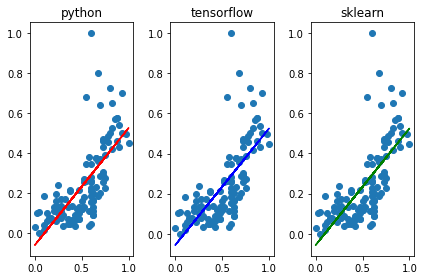

In [6]:
##### 결과를 그래프로 확인해 보아요! #####

fig = plt.figure()

fig_python = fig.add_subplot(1, 3, 1)
fig_tensorflow = fig.add_subplot(1, 3, 2)
fig_sklearn = fig.add_subplot(1, 3, 3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data, x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

plt.tight_layout()
plt.show()

In [7]:
# Multiple Linear Regression을 해보아요

In [8]:
# 데이터 로딩과 전처리

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")

training_data = df[['Solar.R', 'Wind', 'Temp', 'Ozone']]

# 1. 결측치 처리
training_data = training_data.dropna(how='any')

# 2. 이상치 처리
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

training_data = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]

x_data = training_data.drop('Ozone', axis=1, inplace=False).values
t_data = training_data['Ozone'].values.reshape(-1, 1)

# 3.정규화 진행(Normalization)
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

scaled_x.fit(x_data)
scaled_t.fit(t_data)

# 정규화된 Training Data Set 준비
x_data_norm = scaled_x.transform(x_data)
t_data_norm = scaled_t.transform(t_data)

In [9]:
# Tensorflow 구현을 해 보아요!

# Model 생성
keras_model = Sequential()

# Flatten은 input layer의 역할을 수행!
# 당연히 입력 feature들을 받아들이는 역할을 수행!
# Flatten안의 동그라미(node)는 몇개 있어야 하나요? => 3
keras_model.add(Flatten(input_shape=(3,)))

keras_model.add(Dense(units=1,
                      activation='linear'))

# Model 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='mse')

# Model 학습
keras_model.fit(x_data_norm,
                t_data_norm,
                epochs=1000,
                verbose=0)

# Model을 이용한 예측
my_data = np.array([[150.0, 10.0, 80.0]])
scaled_my_data = scaled_x.transform(my_data)

scaled_result = keras_model.predict(scaled_my_data)
result = scaled_t.inverse_transform(scaled_result)

print(f'결과로 알아낸 오존량은 : {result}')  # [[40.570465]]

결과로 알아낸 오존량은 : [[40.756065]]


In [10]:
# sklearn 구현

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습(정규화하지 않은 데이터를 이용)
sklearn_model.fit(x_data, t_data)

# Model로 예측
my_data = np.array([[150.0, 10.0, 80.0]])
result = sklearn_model.predict(my_data)

print(f'결과로 알아낸 오존량은 : {result}')  # [[40.34973385]]

결과로 알아낸 오존량은 : [[40.34973385]]


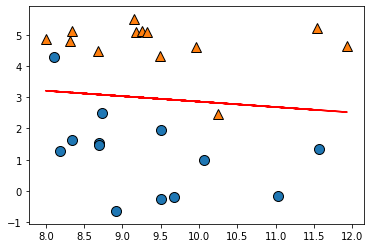

In [11]:
# Logistic Regression의 의미를 코드를 이용해서
# 그림을 통해 알아보아요!

import mglearn

# Training Data Set
x, t = mglearn.datasets.make_forge()

# 이 데이터를 2차원 평면에 점을 찍어서 표현을 해 볼꺼예요!
# x 안에 있는 2개의 값을 각각 x축의 값, y축의 값으로 이용
# 그리고 각 데이터의 target(정답)의 값이 0이면 네모, 1이면 동그라미
# 이렇게 표현을 할 꺼예요!

mglearn.discrete_scatter(x[:, 0], x[:, 1], t)

# 이제 이 데이터에 이용해서 linear regression model을 구현

model = linear_model.LinearRegression()
model.fit(x[:, 0].reshape(-1, 1),
          x[:, 1].reshape(-1, 1))
# 이렇게 학습을 시키면 우리의 모델이 완성
# W와 b를 구할 수 있어요!
plt.plot(x[:, 0], x[:, 0]*model.coef_.ravel() + model.intercept_,
         color='r')
plt.show()

[[0.41831972]]


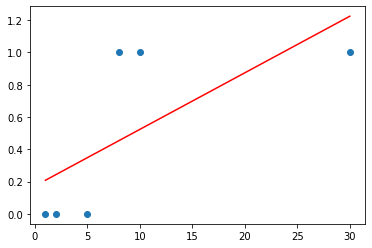

In [12]:
# Training Data Set
x_data = np.array([1, 2, 5, 8, 10, 30])  # 공부시간
t_data = np.array([0, 0, 0, 1, 1, 1])  # 합격여부

# Simple Linear Regression을 해 보아요!
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1),
          t_data.reshape(-1, 1))

print(model.predict(np.array([[7]])))  # [[0.63265306]]
                                       # [[0.41831972]]
                                       
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*model.coef_.ravel() + model.intercept_,
         color='r')
plt.show()

In [13]:
# Logistic Regression을 구현해 보아요!
# sklearn과 tensorflow를 이용해서 구현할꺼예요!
# 간단한 데이터를 이용해서 모델을 완성하고 예측을 해 보아요!

# Training Data Set
# 공부시간에 따른 시험합격여부
x_data = np.arange(2, 21, 2).reshape(-1, 1)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1)

# sklearn 구현
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data, t_data.ravel())

study_hour = np.array([[13]])

result = sklearn_model.predict(study_hour)
print(result)  # [0]

# 확률값을 알고 싶으면
result_proba = sklearn_model.predict_proba(study_hour)
print(result_proba)  # [[0.50009391 0.49990609]]

# Tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))

keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='binary_crossentropy')

keras_model.fit(x_data,
                t_data,
                epochs=500,
                verbose=0)

keras_result = keras_model.predict(study_hour)
print(keras_result)  # [[0.6002893]]

[0]
[[0.50009391 0.49990609]]
[[0.5995411]]
